<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_calculus/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Занятие 3
## Математический анализ
## Решение нелинейных уравнений в Sympy. Solve и solveset.
https://docs.sympy.org/latest/modules/solvers/solveset.html

In [50]:
from sympy import Symbol, symbols, S, solve, solveset, Intersection, Interval, EmptySet, Union, Eq, log, sin, tan, pi
import sympy
from sympy.plotting import *
# Продолжим использовать магию
%matplotlib inline

### Задание 1
Решить уравнение $6x^4 + 9x^3 - 99x^2 - 66x + 360 = 0$ с помощью solve и solveset.

In [8]:
x = symbols('x')
eq = Eq(6*x**4 + 9*x**3 - 99*x**2 - 66*x + 360, 0)

display(solve(eq, x))
display(solveset(eq, x))

[-4, -5/2, 2, 3]

{-4, -5/2, 2, 3}

### Задание 2.
Найти только вещественные решения уравнения $12x^8 + 32x^6 + 21x^4 - 2x^2 - 3 = 0$.

In [15]:
x = symbols('x')
eq = Eq(12*x**8 + 32*x**6 + 21*x**4 - 2*x**2 - 3, 0)

display(solveset(eq, x, domain=S.Reals))

{-sqrt(3)/3, sqrt(3)/3}

### Задание 3.
Решить уравнение $\log_2(\sin(x))=-1$.

In [19]:
x = symbols('x')
eq = Eq(log(sin(x), 2), -1)

display(solveset(eq, x))

Union(ImageSet(Lambda(_n, 2*_n*pi + pi/6), Integers), ImageSet(Lambda(_n, 2*_n*pi + 5*pi/6), Integers))

### Задание 4.
Найти решения уравнения $2{\rm tg}^2(x) - 3{\rm tg}(x) - 5 = 0$ на открытом интервале  $(-5\pi/4, 11\pi/4)$.

In [25]:
x = symbols('x')
eq = Eq(2*tan(x)**2 - 3*tan(x) - 5, 0)
dom = Interval(-5*pi/4, 11*pi/4, left_open=True, right_open=True)

display(solveset(eq, x, dom))

{-pi/4, 3*pi/4, 7*pi/4, -pi + atan(5/2), atan(5/2) + pi, atan(5/2) + 2*pi, atan(5/2)}

### Задание 5.
Найти область определения функции $\sqrt{\sin^2 x - 1}$.

In [42]:
x = symbols('x')
ineq = Eq(sin(x)**2 - 1, 0)

display(solveset(ineq, x, domain=S.Reals))

Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))

### Задание 6.
Найти решение уравнения $\frac{(x^3 + 5 x^2 - 3 x - 15)\ln(x^2 - 3)}{x^2 - 3 x + 2} = 0$. Выполнить проверку подстановкой subs.
#### Указание.
Решение нужно разбить на части. Нужно учесть область определения выражения в левой части уравнения.

In [46]:
x = symbols('x')

ineq = x**2 - 3 > 0
eq = Eq(x**2 - 3*x + 2, 0)

dom = Intersection(solveset(ineq, x, domain=S.Reals), solveset(eq, x, domain=S.Reals).complement(S.Reals))

num = (x**3 + 5*x**2 - 3*x - 15) * log(x**2 - 3)

display(solveset(Eq(num, 0), x, domain=dom))

{-5, -2}

### Индивидуальное задание.
Через все точки пересечения графиков функций $f(x)$ и $g(x)$ провести горизонтальные прямые. Изобразить на графике $f(x)$ зеленым цветом, $g(x)$ красным, горизонтальные линии черным.
Формулы для $f(x)$ и $g(x)$ включить в легенду.

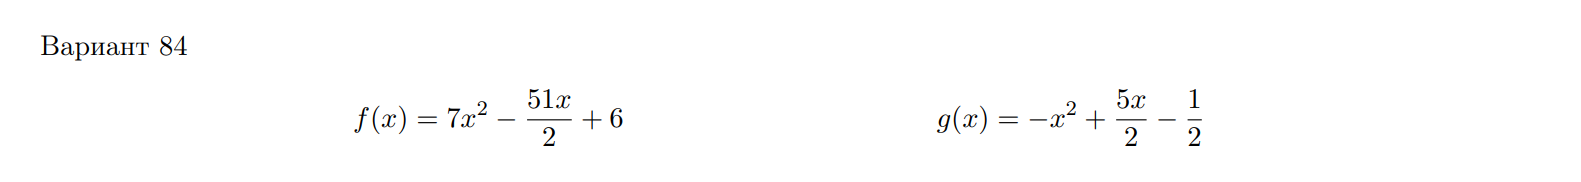

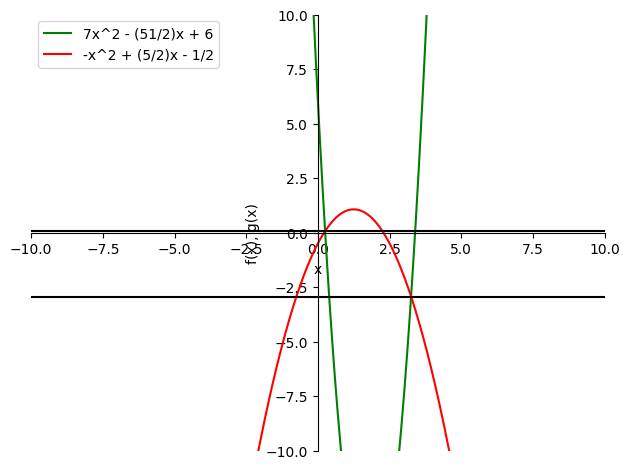

In [65]:
def f(x):
  return 7*x**2 - (51/2)*x + 6

def g(x):
  return -x**2 + (5/2)*x - 1/2

x = symbols('x')

p = plot(xlim=[-10, 10], ylim=[-10, 10], legend=True, xlabel="x", ylabel="f(x), g(x)", show=False)
p.extend(plot(f(x), line_color="green", label="7x^2 - (51/2)x + 6", show=False))
p.extend(plot(g(x), line_color="red", label="-x^2 + (5/2)x - 1/2", show=False))

eq = Eq(f(x), g(x))
points = solve(eq, x, domain=S.Reals)

for x0 in points:
  y0 = f(x0)
  p.extend(plot(y0, line_color="black", label="", show=False))

p.show()